<a href="https://colab.research.google.com/github/strateg17/fake-news/blob/clean/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Git clone

In [ ]:
!git clone https://github.com/strateg17/fake-news.git

Cloning into 'fake-news'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 205 (delta 24), reused 17 (delta 17), pack-reused 156
Receiving objects: 100% (205/205), 157.19 MiB | 23.80 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Updating files: 100% (16/16), done.


In [ ]:
%cd fake-news

/content/fake-news/fake-news


In [ ]:

!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git branch dev

fatal: A branch named 'dev' already exists.


In [ ]:
!git checkout dev

Switched to branch 'dev'


## EDA

In [ ]:
import pandas as pd

In [ ]:
english_fact_train = pd.read_parquet('/content/english_fact_train.parquet')

In [ ]:
english_fact_train

,id,claim,evidence,referenced_explanation,label,url,date,claimant,language
0,0,"Ukraine-Saudi relations at ""most meaningful"" p...","[1]: ""Ukraine-Saudi relations at \""most meanin...",Ukrainian President Volodymyr Zelensky stated ...,Supported,https://www.cnn.com/europe/live-news/russia-uk...,2022-10-17T00:51:51.035Z,CNN,en
1,1,UN nuclear experts begin inspection at Ukraini...,"[1]: ""UN Nuclear Agency Starts Probe Of Russia...",The claim that UN nuclear experts have begun i...,Supported,https://www.cnn.com/europe/live-news/russia-uk...,2022-11-01T00:31:04.391Z,CNN,en
2,2,"Obama ""voted against critical resources: no to...",Source 1: Administration's Military Spending D...,"The claim that Obama ""voted against critical r...",Refuted,https://www.politifact.com/factchecks/2008/jul...,"stated on July 23, 2008 in a radio ad:",Republican National Committee,en
3,3,March 2022 moon crash was orchestrated by the ...,"1. ""The History of Government Cover-ups and C...",? Evidence indicates the rocket part was spa...,Refuted,https://www.politifact.com/factchecks/2022/apr...,"stated on April 11, 2022 in a video:",Facebook posts,en
4,4,Зеленський призначив нового командувача сил те...,Зеленський призначив нового командувача сил те...,Оскільки президент Володимир Зеленський дійсно...,Supported,https://www.pravda.com.ua/news/2022/05/15/7346...,2022-05-15,none,en
...,...,...,...,...,...,...,...,...,...
6297,11211,"""If you will go look up the definition of 'act...","Source 1: ""Georgia Lawmakers Consider Allowing...","The claim that ""If you will go look up the def...",Supported,https://www.politifact.com/factchecks/2010/may...,"stated on May 4, 2010 in remarks to Texas repo...",Rick Perry,en
6298,11213,Zelensky criticizes the EU's Russian oil price...,"[1]: ""Ukraine President Zelenskyy Wants Russia...",Zelensky criticizes the EU's Russian oil price...,Supported,https://www.cnn.com/europe/live-news/russia-uk...,2022-12-04T13:10:02.004Z,CNN,en
6299,11214,Two British men missing in Ukraine,"[1]: ""Two British men missing in Ukraine, say ...","According to the provided evidence, it is supp...",Supported,https://www.bbc.com/news/uk-64214977,2023-01-10T10:06:42.000Z,BBC,en
6300,11215,"""The so-called defense minister of the People'...","1. ""The New York Times"": June 2, 2016, the new...",The claim that the so-called defense minister ...,Supported,https://www.politifact.com/factchecks/2014/jul...,"stated on July 20, 2014 in comments on ""Fox Ne...",John Kerry,en


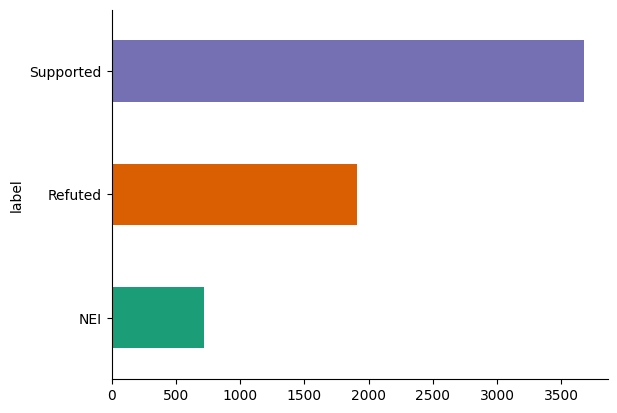

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
english_fact_train.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Top 10 Claimants Grouped by Label

<Figure size 1200x800 with 0 Axes>

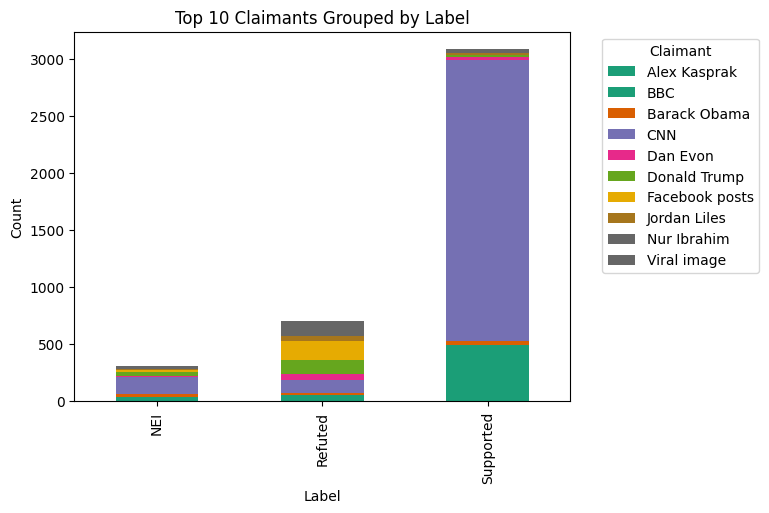

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the dataset
english_fact_train = pd.read_parquet('/content/english_fact_train.parquet')

# Get the top 10 claimants by the number of claims
top_claimants = english_fact_train['claimant'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 claimants
filtered_data = english_fact_train[english_fact_train['claimant'].isin(top_claimants)]

# Group by 'label' and 'claimant' and get the size of each group
grouped_data = filtered_data.groupby(['label', 'claimant']).size().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, colormap='Dark2')
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Top 10 Claimants Grouped by Label')
plt.legend(title='Claimant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


claimant   Alex Kasprak        BBC  Barack Obama        CNN  Dan Evon  \
label                                                                   
NEI            1.929260   9.324759      9.324759  46.945338  4.180064   
Refuted        4.267425   3.698435      2.133713  15.931721  8.392603   
Supported      1.070386  14.985404      1.070386  79.987026  0.616283   

claimant   Donald Trump  Facebook posts  Jordan Liles  Nur Ibrahim  \
label                                                                
NEI            9.967846        6.109325      4.501608     4.501608   
Refuted       16.642959       23.755334      6.116643     6.543385   
Supported      0.616283        0.162180      0.518975     0.940642   

claimant   Viral image  
label                   
NEI           3.215434  
Refuted      12.517781  
Supported     0.032436  


<Figure size 1200x800 with 0 Axes>

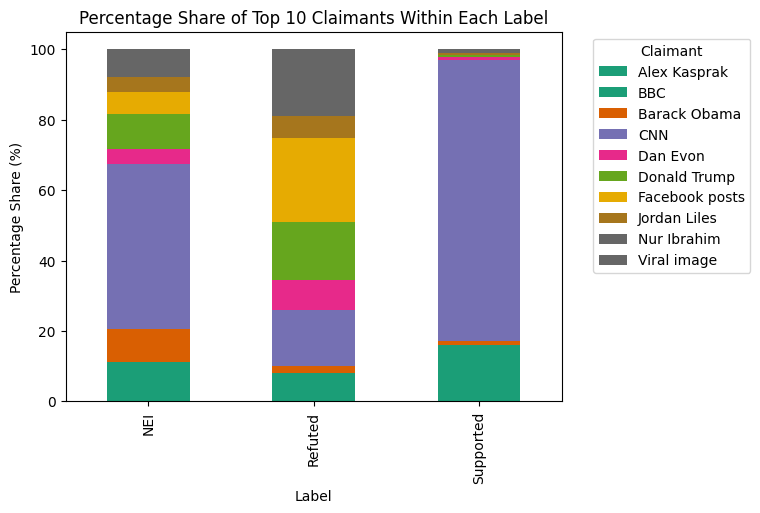

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the dataset
english_fact_train = pd.read_parquet('/content/english_fact_train.parquet')

# Get the top 10 claimants by the number of claims
top_claimants = english_fact_train['claimant'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 claimants
filtered_data = english_fact_train[english_fact_train['claimant'].isin(top_claimants)]

# Group by 'label' and 'claimant' and get the size of each group
grouped_data = filtered_data.groupby(['label', 'claimant']).size().unstack().fillna(0)

# Calculate the percentage share within each label
grouped_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Display the percentage values table
print(grouped_percentage)

# Plot the data
plt.figure(figsize=(12, 8))
grouped_percentage.plot(kind='bar', stacked=True, colormap='Dark2')
plt.ylabel('Percentage Share (%)')
plt.xlabel('Label')
plt.title('Percentage Share of Top 10 Claimants Within Each Label')
plt.legend(title='Claimant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Topic modeling

In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import pandas as pd

# Assuming english_fact_train is already loaded as a DataFrame

# Filter the dataset where the label is 'Refuted'
filtered_data = english_fact_train[english_fact_train['label'] == 'Refuted']

# Assign the 'claim' column of the filtered data to the variable 'corpus'
corpus = filtered_data['claim']

In [ ]:
# Initialize stopwords, punctuation, lemmatizer, and stemmer
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define specific words to stem
words_to_stem = {'ukraine', 'ukrainian', 'russia', 'russian'}

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(stemmer.stem(word) if word in words_to_stem else lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

In [ ]:
from gensim import corpora

# Creating document-term matrix
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [ ]:
from gensim.models import LsiModel

# LSA model
lsa = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# LSA model
print(lsa.print_topics(num_topics=3, num_words=3))

[(0, '0.359*"say" + 0.333*"ukrain" + 0.252*"post"'), (1, '-0.631*"say" + -0.311*"president" + 0.198*"post"'), (2, '0.641*"president" + -0.492*"say" + 0.201*"u"')]


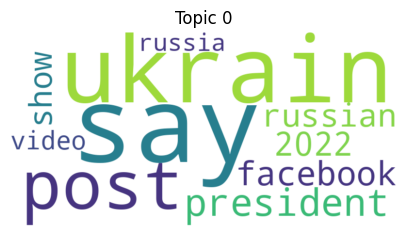

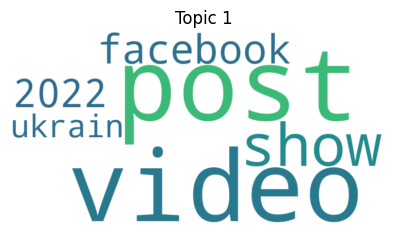

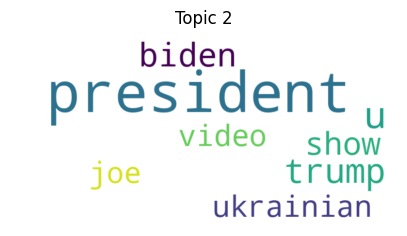

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud  # Import the WordCloud class

# Assuming lsa is already defined and trained

# Extract topics
topics = lsa.show_topics(num_topics=3, num_words=10, formatted=False)

for topic_id, topic in topics:
    topic_words = {word: weight for word, weight in topic}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Display word cloud
    plt.figure(figsize=(5, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Topic {topic_id}')
    plt.show()


In [ ]:
from gensim.models import LdaModel

# LDA model
lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Results
print(lda.print_topics(num_topics=3, num_words=3))

[(0, '0.017*"say" + 0.010*"president" + 0.008*"u"'), (1, '0.009*"say" + 0.009*"u" + 0.008*"ukrainian"'), (2, '0.012*"say" + 0.012*"ukrain" + 0.010*"show"')]


In [ ]:
# Flatten the list of lists and concatenate all strings into a single text string
text = ' '.join([' '.join(inner_list) for inner_list in clean_corpus])

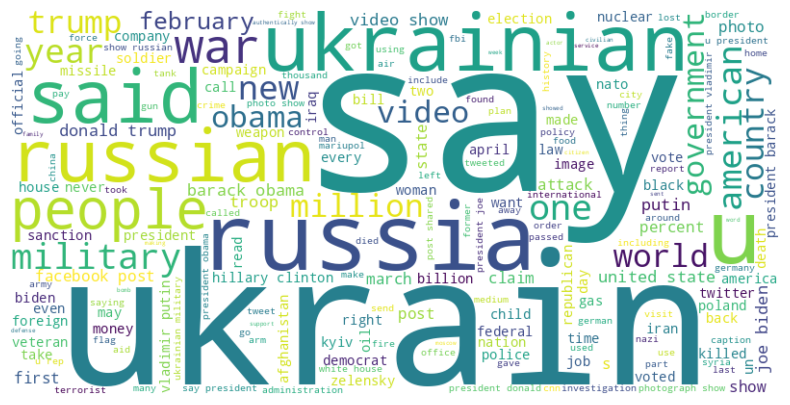

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.5 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
# Create the LSA model
# LDA model
lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# Transform the corpus using the LSA model
corpus_lda = lda[doc_term_matrix]

# Prepare the visualization using pyLDAvis
vis_data = gensimvis.prepare(lda, corpus_lda, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_all = pd.read_parquet('/content/english_fact_train.parquet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus_all = data_all["claim"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create corpus of words from the texts
clean_corpus = [clean(doc).split() for doc in corpus_all]

# Creating document-term matrix
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# LDA model
lda = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)

# Results
print(lda.print_topics(num_topics=3, num_words=3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(2, '0.031*"say" + 0.017*"russia" + 0.017*"ukrainian"'), (0, '0.015*"show" + 0.013*"ukrain" + 0.013*"president"'), (3, '0.028*"say" + 0.021*"russian" + 0.017*"ukrainian"')]


In [ ]:
# Flatten the list of lists and concatenate all strings into a single text string
text = ' '.join([' '.join(inner_list) for inner_list in clean_corpus])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


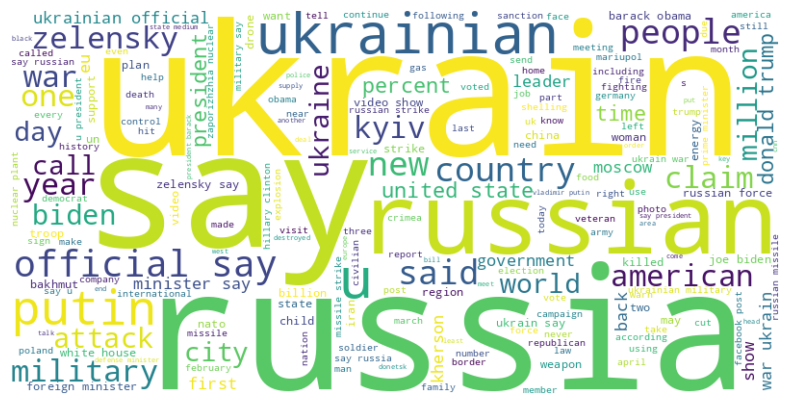

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Transform the corpus using the LSA model
corpus_lda = lda[doc_term_matrix]

# Prepare the visualization using pyLDAvis
vis_data = gensimvis.prepare(lda, corpus_lda, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Classification

In [ ]:
data_all.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,claim,evidence,referenced_explanation,label,url,date,claimant,language
0,0,"Ukraine-Saudi relations at ""most meaningful"" p...","[1]: ""Ukraine-Saudi relations at \""most meanin...",Ukrainian President Volodymyr Zelensky stated ...,Supported,https://www.cnn.com/europe/live-news/russia-uk...,2022-10-17T00:51:51.035Z,CNN,en
1,1,UN nuclear experts begin inspection at Ukraini...,"[1]: ""UN Nuclear Agency Starts Probe Of Russia...",The claim that UN nuclear experts have begun i...,Supported,https://www.cnn.com/europe/live-news/russia-uk...,2022-11-01T00:31:04.391Z,CNN,en


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Assuming you have a parquet file with 'claim' and 'label' columns
df = pd.read_parquet('/content/english_fact_train.parquet')

# Filter the DataFrame to include only 'Supported' or 'Refuted' labels
df = df[df['label'].isin(['Supported', 'Refuted'])]

# Preprocess the text data (basic preprocessing)
df['claim'] = df['claim'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['claim']).toarray()
y = df['label']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence '\w'
<>:8: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-60-b4b95de2b407>:8: DeprecationWarning: invalid escape sequence '\w'
  df['claim'] = df['claim'].str.lower().str.replace('[^\w\s]', '', regex=True)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) #, random_state=42)

# Build and evaluate a logistic regression model using cross-validation
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Train the model on the full training set and evaluate on the test set
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Test metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print test metrics
print(f'Test Accuracy: {accuracy}')
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cross-validation accuracy scores: [0.76744186 0.77101968 0.75849732 0.75985663 0.73835125]
Mean cross-validation accuracy: 0.75903334808061
Test Accuracy: 0.7558181167203724
Test Precision: 0.754882184620323
Test Recall: 0.7558181167203724
Test F1 Score: 0.7384683513294514


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


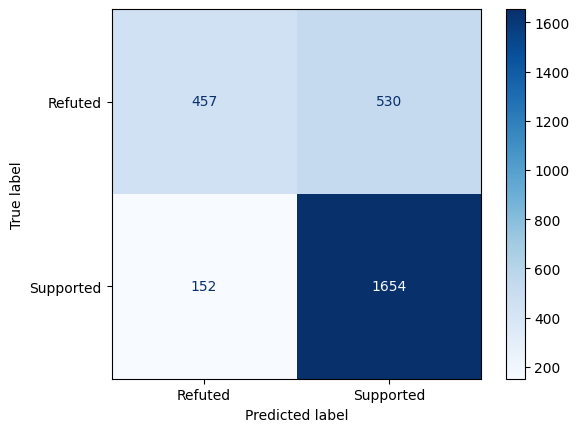

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Filter the DataFrame to include only rows where the label is 'Supported'
#filtered_df = df[df.label == 'Supported']
filtered_df = df[df.label == 'Refuted']
# Reset the index of the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Access the 'claim' value of the first row
claim_value = filtered_df.loc[1, 'claim']

print(claim_value)


march 2022 moon crash was orchestrated by the government and visible from earth


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Example new text message
new_message = """
 march 2022 moon crash was orchestrated by the government and visible from earth
"""

# Preprocess the text message
new_message = new_message.lower().replace('[^\w\s]', '')

# Transform the text message using the same TF-IDF vectorizer
new_message_transformed = tfidf.transform([new_message]).toarray()

# Predict whether the message is fake or not
prediction = log_reg.predict(new_message_transformed)
prediction_proba = log_reg.predict_proba(new_message_transformed)

# Print the prediction
if prediction[0] == 1:
    print("The message is predicted to be fake.")
else:
    print("The message is predicted to be not fake.")

# Print the prediction probabilities
print(f"Prediction probabilities: {prediction_proba[0]}")

The message is predicted to be not fake.
Prediction probabilities: [0.76171133 0.23828867]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\w'
<>:7: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-88-82d3991fd446>:7: DeprecationWarning: invalid escape sequence '\w'
  new_message = new_message.lower().replace('[^\w\s]', '')
